In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
from isometry_pursuit.plot import box_plot

Failed for wine_standardized_6_0p5_10p0: [Errno 2] No such file or directory: '/Users/samsonkoelle/isometry-pursuit/experiments/wine_standardized_6_0p5_10p0'


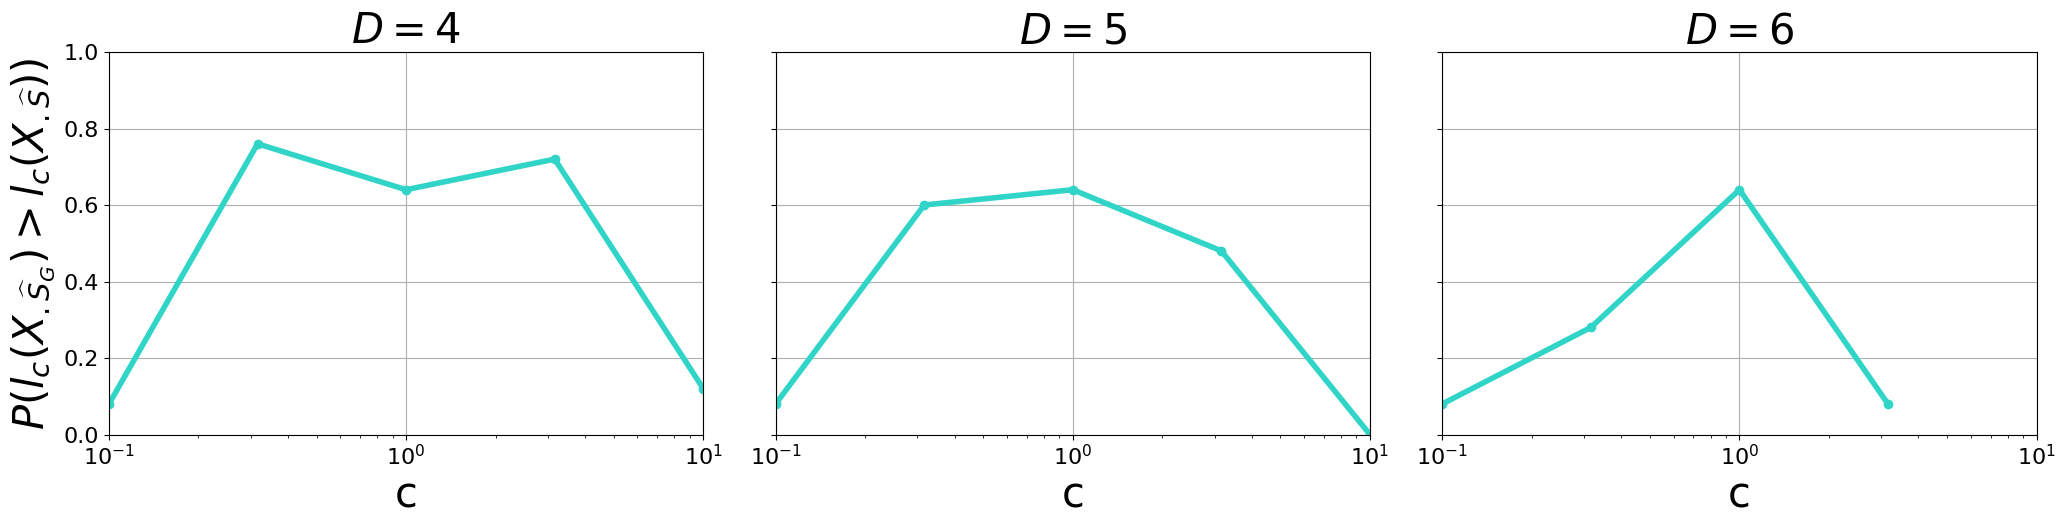

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Settings
powers = np.logspace(-1, 1, 5)
frac = 0.5
D_wines = [4, 5, 6]
name = "wine_standardized"
base_path = "/Users/samsonkoelle/isometry-pursuit/experiments"

# Colors
turquoise = "#30D5C8"
pink = "#FF69B4"

# Global font size settings
plt.rcParams.update({
    'font.size': 18,
    'axes.titlesize': 20,
    'axes.labelsize': 20,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'legend.fontsize': 16,
    'figure.titlesize': 24
})

# Initialize figure
fig, axes = plt.subplots(1, len(D_wines), figsize=(7 * len(D_wines), 6), sharey=True)

for i, D in enumerate(D_wines):
    proportions = []
    ax = axes[i]

    for power in powers:
        power_str = str(power).replace(".", "p")
        frac_str = str(frac).replace(".", "p")
        filename = f"{name}_{D}_{frac_str}_{power_str}"
        filepath = os.path.join(base_path, filename)

        try:
            df = pd.read_csv(filepath)
            losses_1 = df['Losses'].values
            losses_2 = df['Two-Stage Losses'].values

            proportion_blue_greater = np.mean(losses_1 > losses_2)
            proportions.append(proportion_blue_greater)

        except Exception as e:
            print(f"Failed for {filename}: {e}")
            continue

    ax.plot(
        powers[:len(proportions)],
        proportions,
        marker='o',
        color=turquoise,
        linewidth=4
    )
    ax.set_xscale("log")
    ax.set_ylim(0, 1)
    ax.set_xlim(0.1, 10)
    ax.set_title(f"$D = {D}$", fontsize = 30)
    ax.set_xlabel("c", fontsize = 30)
    if i == 0:
        ax.set_ylabel("$P(l_c(X_{.\\widehat{{S}}_G}) > l_c(X_{.\\widehat{{S}}})$)", fontsize = 30)
    ax.grid(True)

# Title and layout
plt.tight_layout()
plt.subplots_adjust(top=0.82)
plt.savefig("grid_power_comparison_bigfonts.png", dpi=300)
plt.show()


In [55]:
power = 1.
R = 25
frac = .1
D_iris = 4
name = "iris_standardized"
filename = f'/Users/samsonkoelle/isometry-pursuit/experiments/{name}_{str(frac).replace(".","p")}_{str(power).replace(".","p")}'
results_iris_p1 = pd.read_csv(filename)

box_plot(results_iris_p1['Brute Isometry Losses'],
         results_iris_p1['Two-Stage Losses'],
         D_iris,
         xlabels = [r'$\widehat S_{B(\cdot,l_1)}$', r'$\widehat S_{TSIP}$'],
         ylabel = r'$l_1(X_{.\widehat {S}}) - D$',
         filename = f'/Users/samsonkoelle/isometry-pursuit/figures/{name}_{str(frac).replace(".","p")}_{str(power).replace(".","p")}_isometry_losses')

box_plot(results_iris_p1['Brute Losses'],
         results_iris_p1['Greedy Multitask Norms (Two-Stage)'],
         D_iris,
         xlabels = [r'$\widehat S_{B(\cdot, {\|\|_{1,2}})}$', r'$\widehat S_{B( \cdot,{\|\|_{1,2}}) \circ IP}$'],
         ylabel = r'$\|(w(X_{.\widehat {S}}, 1))\|_{1,2} - D$',
         filename = f'/Users/samsonkoelle/isometry-pursuit/figures/{name}_{str(frac).replace(".","p")}_{str(power).replace(".","p")}_group_lasso_losses')

power = 1.
R = 25
frac = .1
name = "wine_standardized"
filename = f'/Users/samsonkoelle/isometry-pursuit/experiments/{name}_{str(frac).replace(".","p")}_{str(power).replace(".","p")}'
results_wine_p1 = pd.read_csv(filename)
D_wine = 13

box_plot(results_wine_p1['Brute Isometry Losses'],
         results_wine_p1['Two-Stage Losses'],
         D_wine,
         xlabels = [r'$\widehat S_{B(\cdot,l_1)}$', r'$\widehat S_{TSIP}$'],
         ylabel = r'$l_1(X_{.\widehat {S}}) - D$',
         filename = f'/Users/samsonkoelle/isometry-pursuit/figures/{name}_{str(frac).replace(".","p")}_{str(power).replace(".","p")}_isometry_losses')

box_plot(results_wine_p1['Brute Losses'],
         results_wine_p1['Greedy Multitask Norms (Two-Stage)'],
         D_wine,
         xlabels = [r'$\widehat S_{B(\cdot, {\|\|_{1,2}})}$', r'$\widehat S_{B( \cdot,{\|\|_{1,2}}) \circ IP}$'],
         ylabel = r'$\|w((X_{.\widehat {S}}, 1))\|_{1,2} - D$',
         filename = f'/Users/samsonkoelle/isometry-pursuit/figures/{name}_{str(frac).replace(".","p")}_{str(power).replace(".","p")}_group_lasso_losses')

In [44]:
power = 1.
D_wine = 6
frac = .5
R = 25
name = "wine_standardized"
filename = f'/Users/samsonkoelle/isometry-pursuit/experiments/{name}_{str(frac).replace(".","p")}_{str(power).replace(".","p")}'
results_wine_p5 = pd.read_csv(filename)
box_plot(results_wine_p5['Losses'],
         results_wine_p5['Two-Stage Losses'],
         D_iris,
         xlabels = [r'$\widehat S_{g}$', r'$\widehat S_{TSIP}$'],
         ylabel = r'$l_1(X_{.\widehat {S}}) - D$',
         filename = f'/Users/samsonkoelle/isometry-pursuit/figures/{name}_{str(frac).replace(".","p")}_{str(power).replace(".","p")}_isometry_losses')

name = "iris_standardized"
filename = f'/Users/samsonkoelle/isometry-pursuit/experiments/{name}_{str(frac).replace(".","p")}_{str(power).replace(".","p")}'
results_iris_p5 = pd.read_csv(filename)
box_plot(results_iris_p5['Losses'],
         results_iris_p5['Two-Stage Losses'],
         D_iris,
         xlabels = [r'$\widehat S_{g}$', r'$\widehat S_{TSIP}$'],
         ylabel = r'$l_1(X_{.\widehat {S}}) - D$',
         filename = f'/Users/samsonkoelle/isometry-pursuit/figures/{name}_{str(frac).replace(".","p")}_{str(power).replace(".","p")}_isometry_losses')


power = 1.
R = 100
frac = .1
filename = f'/Users/samsonkoelle/isometry-pursuit/experiments/ethanol_results.csv'
results_ethanol = pd.read_csv(filename)
D_ethanol = 2

box_plot(results_ethanol['Losses'],
         results_ethanol['Two-Stage Losses'],
         D_ethanol,
         xlabels = [r'$\widehat S_{g}$', r'$\widehat S_{TSIP}$'],
         ylabel = r'$l_1(X_{.\widehat {S}}) - D$',
         filename = f'/Users/samsonkoelle/isometry-pursuit/figures/ethanol_isometry_losses')

In [58]:
import matplotlib.pyplot as plt

# Define Garfield High School Purple color
garfield_purple = "#4E2A84"

# Wine dataset
plt.figure()  # Create a new figure
plt.hist(
    results_wine_p5['Support Cardinalities (Basis Pursuit)'],
    bins=range(
        min(results_wine_p5['Support Cardinalities (Basis Pursuit)']),
        max(results_wine_p5['Support Cardinalities (Basis Pursuit)']) + 2
    ),
    color=garfield_purple, edgecolor='white', align='left'
)
plt.xlabel('Cardinality', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('/Users/samsonkoelle/isometry-pursuit/figures/wine_cardinalities')
plt.close()

# Iris dataset
plt.figure()  # Create a new figure
plt.hist(
    results_iris_p5['Support Cardinalities (Basis Pursuit)'],
    bins=range(
        min(results_iris_p5['Support Cardinalities (Basis Pursuit)']),
        max(results_iris_p5['Support Cardinalities (Basis Pursuit)']) + 2
    ),
    color=garfield_purple, edgecolor='white', align='left'
)
plt.xlabel('Cardinality', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('/Users/samsonkoelle/isometry-pursuit/figures/iris_cardinalities')
plt.close()

# Ethanol dataset (25-wide bins)
plt.figure()  # Create a new figure
ethanol_min = min(results_ethanol['Support Cardinalities (Basis Pursuit)'])
ethanol_max = max(results_ethanol['Support Cardinalities (Basis Pursuit)'])
plt.hist(
    results_ethanol['Support Cardinalities (Basis Pursuit)'],
    bins=range(ethanol_min, ethanol_max + 26, 25),  # Step size 25 for bins
    color=garfield_purple, edgecolor='white'
)
plt.xlabel('Cardinality', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('/Users/samsonkoelle/isometry-pursuit/figures/ethanol_cardinalities')
plt.close()


In [46]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_rel

# Compute p-values using paired two-sample t-test
iris_p_value = ttest_rel(
    results_iris_p5['Losses'], results_iris_p5['Two-Stage Losses']
).pvalue
wine_p_value = ttest_rel(
    results_wine_p5['Losses'], results_wine_p5['Two-Stage Losses']
).pvalue
ethanol_p_value = ttest_rel(
    results_ethanol['Losses'], results_ethanol['Two-Stage Losses']
).pvalue

# Data summarization for the table
data = {
    "Name": ["Iris", "Wine", "Ethanol"],
    "$D$": [4, 6, 2],
    "$P$": [75, 89, 756],
    "$R$": [25, 25, 100],
    "$c$": [1,1,1],
    "$l_1(X_{.\\widehat{S}_{G}})$": [
        f"{results_iris_p5['Losses'].mean():.1f} ± {results_iris_p5['Losses'].std():.1f}",
        f"{results_wine_p5['Losses'].mean():.1f} ± {results_wine_p5['Losses'].std():.1f}",
        f"{results_ethanol['Losses'].mean():.1f} ± {results_ethanol['Losses'].std():.1f}"
    ],
    "$|\\widehat{S}_{TSIP}|$": [
        f"{results_iris_p5['Support Cardinalities (Basis Pursuit)'].mean():.0f} ± {results_iris_p5['Support Cardinalities (Basis Pursuit)'].std():.0f}",
        f"{results_wine_p5['Support Cardinalities (Basis Pursuit)'].mean():.0f} ± {results_wine_p5['Support Cardinalities (Basis Pursuit)'].std():.0f}",
        f"{results_ethanol['Support Cardinalities (Basis Pursuit)'].mean():.0f} ± {results_ethanol['Support Cardinalities (Basis Pursuit)'].std():.0f}"
    ],
    "$l_1(X_{.\\widehat{S}})$": [
        f"{results_iris_p5['Two-Stage Losses'].mean():.1f} ± {results_iris_p5['Two-Stage Losses'].std():.1f}",
        f"{results_wine_p5['Two-Stage Losses'].mean():.1f} ± {results_wine_p5['Two-Stage Losses'].std():.1f}",
        f"{results_ethanol['Two-Stage Losses'].mean():.1f} ± {results_ethanol['Two-Stage Losses'].std():.1f}"
    ],
    "$P_R (l_1(X_{.\\widehat{S}_{G}}) > l_1(X_{.\\widehat{S}_{TSIP}}))$": [
        round(len(np.where(results_iris_p5['Losses'] > results_iris_p5['Two-Stage Losses'])[0]) / 25, 2),
        round(len(np.where(results_wine_p5['Losses'] > results_wine_p5['Two-Stage Losses'])[0]) / 25, 2),
        round(len(np.where(results_ethanol['Losses'] > results_ethanol['Two-Stage Losses'])[0]) / 100, 2)
    ],
    "$P_R (l_1(X_{.\\widehat{S}_{G}}) = l_1(X_{.\\widehat{S}_{TSIP}}))$": [
        round(len(np.where(results_iris_p5['Losses'] == results_iris_p5['Two-Stage Losses'])[0]) / 25, 2),
        round(len(np.where(results_wine_p5['Losses'] == results_wine_p5['Two-Stage Losses'])[0]) / 25, 2),
        round(len(np.where(results_ethanol['Losses'] == results_ethanol['Two-Stage Losses'])[0]) / 100, 2)
    ],
    "$\widehat P(\\bar{l}_1(X_{.\\widehat{S}_{G}}) > \\bar{l}_1(X_{.\\widehat{S}_{TSIP}}))$": [
        f"{iris_p_value:.1e}",
        f"{wine_p_value:.1e}",
        f"{ethanol_p_value:.1e}"
    ]
}

# Create a DataFrame
df_table = pd.DataFrame(data).iloc[:,]
# Convert to LaTeX
latex_table = df_table.to_latex(
    index=False,
    escape=False,  # Prevent escaping special characters
    column_format="|c|c|c|c|c|c|c|c|c|c|c|",  # Column format matches your table
    header=True
)

print(latex_table)

\begin{tabular}{|c|c|c|c|c|c|c|c|c|c|c|}
\toprule
Name & $D$ & $P$ & $R$ & $c$ & $l_1(X_{.\widehat{S}_{G}})$ & $|\widehat{S}_{TSIP}|$ & $l_1(X_{.\widehat{S}})$ & $P_R (l_1(X_{.\widehat{S}_{G}}) > l_1(X_{.\widehat{S}_{TSIP}}))$ & $P_R (l_1(X_{.\widehat{S}_{G}}) = l_1(X_{.\widehat{S}_{TSIP}}))$ & $\widehat P(\bar{l}_1(X_{.\widehat{S}_{G}}) > \bar{l}_1(X_{.\widehat{S}_{TSIP}}))$ \\
\midrule
Iris & 4 & 75 & 25 & 1 & 13.8 ± 7.3 & 7 ± 1 & 6.9 ± 1.4 & 0.960000 & 0.000000 & 2.4e-05 \\
Wine & 6 & 89 & 25 & 1 & 7.7 ± 0.3 & 13 ± 2 & 7.6 ± 0.3 & 0.640000 & 0.160000 & 6.3e-04 \\
Ethanol & 2 & 756 & 100 & 1 & 2.6 ± 0.3 & 90 ± 165 & 2.5 ± 0.2 & 0.660000 & 0.170000 & 2.1e-05 \\
\bottomrule
\end{tabular}



In [52]:
data = {
    "Name": ["Iris", "Wine", "Ethanol"],
    "IP": [
        f"{results_iris_p5['Basis Pursuit Times'].mean():.2f} ± {results_iris_p5['Basis Pursuit Times'].std():.2f}",
        f"{results_wine_p5['Basis Pursuit Times'].mean():.2f} ± {results_wine_p5['Basis Pursuit Times'].std():.2f}",
        f"{results_ethanol['Basis Pursuit Times'].mean():.2f} ± {results_ethanol['Basis Pursuit Times'].std():.2f}"
    ],
    "2nd stage": [
        f"{results_iris_p5['Stage Two Times'].mean():.2f} ± {results_iris_p5['Stage Two Times'].std():.2f}",
        f"{results_wine_p5['Stage Two Times'].mean():.2f} ± {results_wine_p5['Stage Two Times'].std():.2f}",
        f"{results_ethanol['Stage Two Times'].mean():.2f} ± {results_ethanol['Stage Two Times'].std():.2f}"
    ],
    "Greedy": [
        f"{results_iris_p5['Greedy Times'].mean():.2f} ± {results_iris_p5['Greedy Times'].std():.2f}",
        f"{results_wine_p5['Greedy Times'].mean():.2f} ± {results_wine_p5['Greedy Times'].std():.2f}",
        f"{results_ethanol['Greedy Times'].mean():.2f} ± {results_ethanol['Greedy Times'].std():.2f}"
    ],
}

In [53]:
# Create a DataFrame
df_table = pd.DataFrame(data).iloc[:,]
# Convert to LaTeX
latex_table = df_table.to_latex(
    index=False,
    escape=False,  # Prevent escaping special characters
    column_format="|c|c|c|c",  # Column format matches your table
    header=True
)

print(latex_table)

\begin{tabular}{|c|c|c|c}
\toprule
Name & IP & 2nd stage & Greedy \\
\midrule
Iris & 1.24 ± 0.02 & 0.00 ± 0.00 & 0.02 ± 0.00 \\
Wine & 2.32 ± 0.17 & 0.13 ± 0.12 & 0.03 ± 0.00 \\
Ethanol & 8.38 ± 0.57 & 0.55 ± 1.08 & 0.07 ± 0.01 \\
\bottomrule
\end{tabular}

